<h1 style="color:#872325"> Proyecto Final Portafolios </h1>

### Elaboró: Jorge Alberto Morúa Amaya
### Clave: 193699
### 22/06/2020

El objetivo del examen final es construir un portafolio riesgoso con 7 acciones e invertir en un
portafolio completo que maximice tu utilidad. Considera una tasa libre de riesgo de 5.0%, un premio
por riesgo de mercado de 10.0% y un nivel de aversión al riesgo A=3

## Librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.optimize as sco
import scipy.interpolate as sci
from scipy.stats import norm
import random
%matplotlib inline

In [2]:
#cargamos el archivo con la informacion del IPC
#leemos el archivo
ipc_path = "ipc.xlsx" # Modificar a ruta
market = pd.read_excel(ipc_path, index_col=0)
market.columns = [c.replace(" MF Equity", "").replace(" INDEX", "").replace("*","") for c in market]
market.head()

,KIMBERA,GAPB,CEMEXCPO,ASURB,GFNORTEO,KOFUBL,AC,LABB,FEMSAUBD,OMAB,...,MEGACPO,GCC,BIMBOA,GMEXICOB,GCARSOA1,TLEVICPO,ALFAA,BSMXB,PINFRA,MEXBOL
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57


In [3]:
market.columns

Index(['KIMBERA', 'GAPB', 'CEMEXCPO', 'ASURB', 'GFNORTEO', 'KOFUBL', 'AC',
       'LABB', 'FEMSAUBD', 'OMAB', 'GFINBURO', 'AMXL', 'ALSEA', 'ORBIA',
       'PE&OLES', 'GRUMAB', 'RA', 'WALMEX', 'BOLSAA', 'LIVEPOLC', 'GENTERA',
       'IENOVA', 'CUERVO', 'ELEKTRA', 'BBAJIOO', 'ALPEKA', 'MEGACPO', 'GCC',
       'BIMBOA', 'GMEXICOB', 'GCARSOA1', 'TLEVICPO', 'ALFAA', 'BSMXB',
       'PINFRA', 'MEXBOL'],
      dtype='object')

In [4]:
#obtenemos solo las 7 columnas de las empresas que vamos a analizar
p_7prod = market[['ALSEA','WALMEX','LIVEPOLC','GENTERA','ELEKTRA','MEGACPO','GCARSOA1','MEXBOL']]
#p_7prod = market[['ASURB','GFNORTEO','PE&OLES','WALMEX','IENOVA','MEXBOL']]
p_7prod.head()

,ALSEA,WALMEX,LIVEPOLC,GENTERA,ELEKTRA,MEGACPO,GCARSOA1,MEXBOL
DATE,,,,,,,,
2016-01-01,59.85,43.49,210.11,33.35,379.04,64.19,70.98,42977.50
2016-01-04,58.93,42.84,209.83,31.80,368.42,64.45,69.83,42113.70
2016-01-05,59.41,42.66,210.42,32.16,357.30,63.16,70.70,42041.68
2016-01-06,59.19,42.38,206.98,31.89,342.66,63.27,70.47,41691.19
2016-01-07,56.93,39.99,209.60,30.59,334.15,62.78,68.15,40661.57


In [5]:
#obtenemos la base con los rendimientos 
df_rend = p_7prod / p_7prod.shift(periods=1) - 1
df_rend.index = pd.to_datetime(df_rend.index)
df_rend = df_rend.drop(df_rend.index[0],axis=0)
df_rend.head()

,ALSEA,WALMEX,LIVEPOLC,GENTERA,ELEKTRA,MEGACPO,GCARSOA1,MEXBOL
DATE,,,,,,,,
2016-01-04,-0.015372,-0.014946,-0.001333,-0.046477,-0.028018,0.004050,-0.016202,-0.020099
2016-01-05,0.008145,-0.004202,0.002812,0.011321,-0.030183,-0.020016,0.012459,-0.001710
2016-01-06,-0.003703,-0.006564,-0.016348,-0.008396,-0.040974,0.001742,-0.003253,-0.008337
2016-01-07,-0.038182,-0.056395,0.012658,-0.040765,-0.024835,-0.007745,-0.032922,-0.024696
2016-01-08,-0.003337,0.026007,-0.005582,-0.002288,-0.013617,0.000796,-0.000587,-0.009744


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000010E891A63C8>,
      dtype=object)

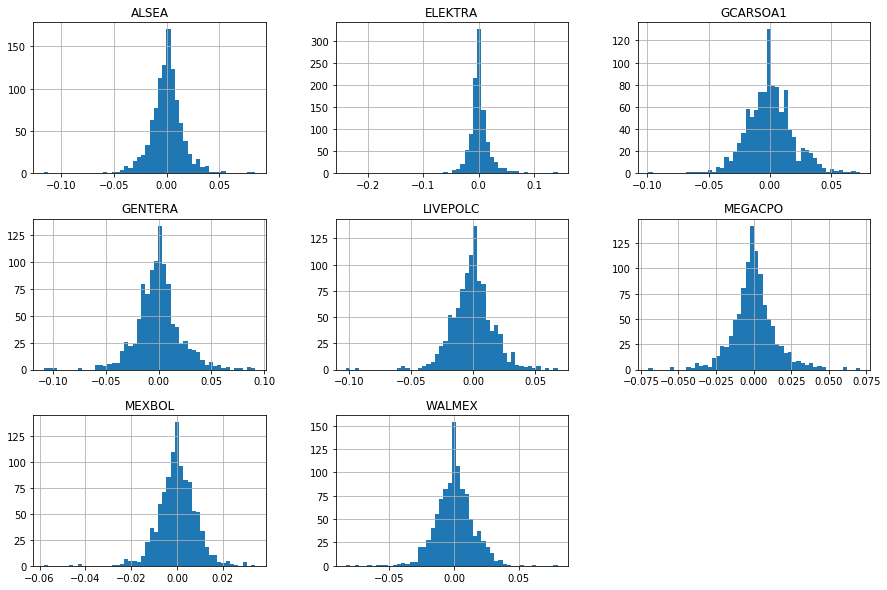

In [6]:
df_rend.hist(bins=50, figsize=(15, 10))

# 1.- Rendimiento esperado diario y anual

## Modelo de Rendimiento promedio constante

In [7]:
#tasa libre de riesgo
rf = 0.05 
#premio por riesgo de mercado
market = .10
#Aversion al riesgo
A=3

In [8]:
#Obtenemos el rendimiento esperado diario
rend_diario = df_rend.mean()
rend_diario *100

ALSEA      -0.001872
WALMEX      0.032709
LIVEPOLC   -0.059259
GENTERA    -0.028425
ELEKTRA     0.145545
MEGACPO     0.027426
GCARSOA1    0.022405
MEXBOL      0.007144
dtype: float64

In [9]:
#Obtenemos el rendimiento esperado anual 
rend_anual = rend_diario * 252
rend_anual * 100

ALSEA       -0.471813
WALMEX       8.242580
LIVEPOLC   -14.933242
GENTERA     -7.163028
ELEKTRA     36.677386
MEGACPO      6.911256
GCARSOA1     5.646045
MEXBOL       1.800402
dtype: float64

In [10]:
#obtenemos la varianza diaria
var_diario = df_rend.var()
var_diario * 100

ALSEA       0.023536
WALMEX      0.021517
LIVEPOLC    0.025872
GENTERA     0.042538
ELEKTRA     0.042831
MEGACPO     0.019039
GCARSOA1    0.036081
MEXBOL      0.007074
dtype: float64

In [11]:
#obtenemos la varianza anual
var_anual = var_diario * 252
var_anual * 100

ALSEA        5.931130
WALMEX       5.422218
LIVEPOLC     6.519680
GENTERA     10.719646
ELEKTRA     10.793488
MEGACPO      4.797922
GCARSOA1     9.092441
MEXBOL       1.782711
dtype: float64

In [12]:
#obtenemos la desviacion diaria
desv_diaria =  np.sqrt(var_diario)
desv_diaria * 100

ALSEA       1.534152
WALMEX      1.466858
LIVEPOLC    1.608470
GENTERA     2.062481
ELEKTRA     2.069572
MEGACPO     1.379832
GCARSOA1    1.899503
MEXBOL      0.841086
dtype: float64

In [13]:
#obtenemos la desviacion anual
desv_anual = desv_diaria * 252
desv_anual * 100

ALSEA       386.606368
WALMEX      369.648324
LIVEPOLC    405.334357
GENTERA     519.745214
ELEKTRA     521.532257
MEGACPO     347.717757
GCARSOA1    478.674758
MEXBOL      211.953555
dtype: float64

## Modelo CAPM

In [14]:
# obtenemos los rendimientos bajo el metodo CAPM
rets = np.log(p_7prod / p_7prod.shift(1))
rets = rets.drop(rets.index[0],axis=0)
#Eliminamos la columna de MEXBOX
rets

,ALSEA,WALMEX,LIVEPOLC,GENTERA,ELEKTRA,MEGACPO,GCARSOA1,MEXBOL
DATE,,,,,,,,
2016-01-04,-0.015491,-0.015059,-0.001334,-0.047591,-0.028418,0.004042,-0.016334,-0.020304
2016-01-05,0.008112,-0.004211,0.002808,0.011257,-0.030648,-0.020219,0.012382,-0.001712
2016-01-06,-0.003710,-0.006585,-0.016483,-0.008431,-0.041837,0.001740,-0.003258,-0.008372
2016-01-07,-0.038930,-0.058047,0.012579,-0.041619,-0.025149,-0.007775,-0.033476,-0.025006
2016-01-08,-0.003343,0.025674,-0.005598,-0.002291,-0.013710,0.000796,-0.000587,-0.009792
...,...,...,...,...,...,...,...,...
2019-12-30,-0.008767,-0.026591,-0.012717,-0.020276,0.003906,0.000000,-0.008985,-0.013741
2019-12-31,-0.002806,-0.000554,-0.023050,0.022333,-0.001440,0.002845,0.000286,-0.002671
2020-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
#Rendimientos diarios y anuales
rets_diario = rets.mean()
rets_anual = rets.mean() * 252
print("El rendimiento diario de cada accion es: ")
print(rets_diario)
print("-"*50)
print("Los rendimientos anuales de cada accion son: ")
print(rets_anual)

El rendimiento diario de cada accion es: 
ALSEA      -0.000137
WALMEX      0.000219
LIVEPOLC   -0.000723
GENTERA    -0.000497
ELEKTRA     0.001239
MEGACPO     0.000179
GCARSOA1    0.000044
MEXBOL      0.000036
dtype: float64
--------------------------------------------------
Los rendimientos anuales de cada accion son: 
ALSEA      -0.034416
WALMEX      0.055259
LIVEPOLC   -0.182101
GENTERA    -0.125242
ELEKTRA     0.312267
MEGACPO     0.045191
GCARSOA1    0.011088
MEXBOL      0.009071
dtype: float64


¿Cual es la beta de cada accion ?

In [16]:
#Obtenemos la lista de las acciones
df_col = rets.columns
noa = len(df_col)
noa

8

In [17]:
def get_linReg(x,y):
    """
    Funcion para obtener la regresion lineal y obtener los valores de las beta 
    x = Variable independiente
    y = Variable dependiente
    """
    # creamos una instancia de LinearRegression
    regresion_lineal = LinearRegression() 
    # instruimos a la regresión lineal que aprenda de los datos (x,y)
    regresion_lineal.fit(x,y) 
    return regresion_lineal.coef_[0][0]

In [18]:
# obtenemos la lista de las betas deacuerdo al orden de la lista de las columnas "df_col"
ls_betas = []
ls_tipo_accion = []
for col in df_col:
    b = get_linReg(np.array( rets[df_col[-1]]).reshape(-1,1), np.array( rets[col]).reshape(-1,1))
    if b >= 1:
        if col =='MEXBOL':
            ls_tipo_accion.append("MERCADO")
        else:
            ls_tipo_accion.append("AGRESIVA")
    else :
        ls_tipo_accion.append("DEFENSIVA")        
    ls_betas.append(b)

print("Las betas obtenidas son:")
ls_betas

Las betas obtenidas son:


[0.8272279570389357,
 0.8915984490666613,
 1.0029318774819267,
 1.0106473333911692,
 0.3782192341972521,
 0.4041981292722522,
 1.0848765106386307,
 1.0]

¿Clasifica las acciones en defensivas y agresivas?

In [19]:
def CAPM(rf,market,beta):
    return rf+(beta*(market-rf))

In [20]:
#Imprimimos la lista de las columnas
arr_betas = np.array(ls_betas).reshape(-1,1)
df_betas = pd.DataFrame(data=arr_betas, index=[df_col], columns=["BETAS"])
df_betas['TIPO'] = ls_tipo_accion
df_betas['CAPM'] = CAPM(rf,market,df_betas["BETAS"])
df_betas['REN_ESP'] = rf + df_betas["BETAS"] * market
df_betas=df_betas.drop("MEXBOL",axis=0)
df_betas

C:\Users\mb83982\AppData\Local\anaconda3\lib\site-packages\pandas\core\generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


,BETAS,TIPO,CAPM,REN_ESP
ALSEA,0.827228,DEFENSIVA,0.091361,0.132723
WALMEX,0.891598,DEFENSIVA,0.094580,0.139160
LIVEPOLC,1.002932,AGRESIVA,0.100147,0.150293
GENTERA,1.010647,AGRESIVA,0.100532,0.151065
ELEKTRA,0.378219,DEFENSIVA,0.068911,0.087822
MEGACPO,0.404198,DEFENSIVA,0.070210,0.090420
GCARSOA1,1.084877,AGRESIVA,0.104244,0.158488


In [21]:
#eliminamos la columna de MEXBOL para continuar con los calculos
rets = rets.drop("MEXBOL",axis=1)

In [22]:
#Actualizamos el valore del number of asets (noa)
noa =  len(rets.columns)
noa

7

# 2.- Matriz varianza-covarianza

In [23]:
print("Matriz covarianza diaria")
cov_mtx = rets.cov()
cov_mtx

Matriz covarianza diaria


,ALSEA,WALMEX,LIVEPOLC,GENTERA,ELEKTRA,MEGACPO,GCARSOA1
ALSEA,0.000236,0.000058,0.000080,0.000086,0.000032,0.000025,0.000081
WALMEX,0.000058,0.000216,0.000067,0.000064,0.000028,0.000023,0.000057
LIVEPOLC,0.000080,0.000067,0.000260,0.000087,0.000031,0.000045,0.000084
GENTERA,0.000086,0.000064,0.000087,0.000426,0.000034,0.000030,0.000112
ELEKTRA,0.000032,0.000028,0.000031,0.000034,0.000434,0.000014,0.000052
MEGACPO,0.000025,0.000023,0.000045,0.000030,0.000014,0.000190,0.000025
GCARSOA1,0.000081,0.000057,0.000084,0.000112,0.000052,0.000025,0.000360


In [24]:
print("Matriz de covarianza anualizada.")
cov_mtx_anual = rets.cov() * 252
cov_mtx_anual

Matriz de covarianza anualizada.


,ALSEA,WALMEX,LIVEPOLC,GENTERA,ELEKTRA,MEGACPO,GCARSOA1
ALSEA,0.059537,0.014589,0.020244,0.021743,0.008162,0.006385,0.020292
WALMEX,0.014589,0.054454,0.016829,0.016238,0.007163,0.005766,0.014444
LIVEPOLC,0.020244,0.016829,0.065645,0.022007,0.007799,0.011279,0.021216
GENTERA,0.021743,0.016238,0.022007,0.107366,0.008496,0.007616,0.028242
ELEKTRA,0.008162,0.007163,0.007799,0.008496,0.109321,0.003477,0.013206
MEGACPO,0.006385,0.005766,0.011279,0.007616,0.003477,0.047836,0.006352
GCARSOA1,0.020292,0.014444,0.021216,0.028242,0.013206,0.006352,0.090802


In [25]:
#Obtenemos la diagonal de la matriz de covarianza
mtx_diagonal = np.diagonal(cov_mtx)
mtx_diagonal

array([0.00023626, 0.00021609, 0.0002605 , 0.00042606, 0.00043381,
       0.00018983, 0.00036033])

# 3.- Frontera de carteras de mínima varianza y frontera eficiente 

In [26]:
#obtenemos las betas previamente generadas
print("Los rendimientos esperados son:")
rend_esp = np.array(df_betas["REN_ESP"])
rend_esp

Los rendimientos esperados son:


array([0.1327228 , 0.13915984, 0.15029319, 0.15106473, 0.08782192,
       0.09041981, 0.15848765])

### Grafica con ventas en corto

In [27]:
#Guarda rendimiento del portafolio
ls_rendimientos = []
ls_varianza = []
ls_Sharpe = []
ls_Pesos = []

#Simulación de Portafolios
itera = 500_000

#Pesos con venta en corto
array_pesos = np.zeros(shape=[itera,noa])

for t in range(len(array_pesos)):
    for i in range(noa):
        array_pesos[t][i] = random.randrange(start = -10000, stop = 10000)/10000
        
for i in range(len(array_pesos)):
    array_pesos[i][noa-1] = 1 - (array_pesos[i][0:noa-1].sum())    

In [28]:
for val in range(itera):    
    #Pesos 
    pesos = array_pesos[val]    
    #Rendimiento
    rendimientos = np.dot(pesos, rend_esp)    
    #Varianza
    varianza = np.sqrt(np.dot(pesos.T, np.dot(cov_mtx, pesos)))*252
    #Sharpe
    sharpe = rendimientos  / (varianza)
    
    #Guarda los valores en las listas 
    ls_Sharpe.append(sharpe)
    ls_rendimientos.append(rendimientos)
    ls_varianza.append(varianza)
    ls_Pesos.append(pesos)

In [29]:
# Transforma listas en dataFrame
detalle_p = {'Rendimientos': ls_rendimientos,'Varianza': ls_varianza,'Val_Sharpe': ls_Sharpe}

for i, col in enumerate(rets.columns):
    detalle_p[col ] = [j[i] for j in ls_Pesos]    

df_cvc = pd.DataFrame(detalle_p)

In [30]:
# Imprime portafolio de mínima varianza y portafolio que max Coef Sharpe
var_min    = df_cvc['Varianza'].min()
sharp_max  = df_cvc['Val_Sharpe'].max()

#Crea portafolios
p_riesgoso = df_cvc.loc[df_cvc['Val_Sharpe'] == sharp_max]
p_min_Var = df_cvc.loc[df_cvc['Varianza'] == var_min]

print("Portafolio con la minima varianza es: ")
print(p_min_Var)
print('-' * 50)
print("El portafolio riesgozo es: ")
print(p_riesgoso)


Portafolio con la minima varianza es: 
        Rendimientos  Varianza  Val_Sharpe   ALSEA  WALMEX  LIVEPOLC  GENTERA  \
247345      0.116576  2.281074    0.051106  0.2472  0.1924    0.0906    0.061   

        ELEKTRA  MEGACPO  GCARSOA1  
247345   0.1645   0.2792   -0.0349  
--------------------------------------------------
El portafolio riesgozo es: 
        Rendimientos  Varianza  Val_Sharpe   ALSEA  WALMEX  LIVEPOLC  GENTERA  \
467913      0.126486  2.296465    0.055079  0.0764  0.3223    0.0816   0.0514   

        ELEKTRA  MEGACPO  GCARSOA1  
467913   0.1146   0.2153    0.1384  


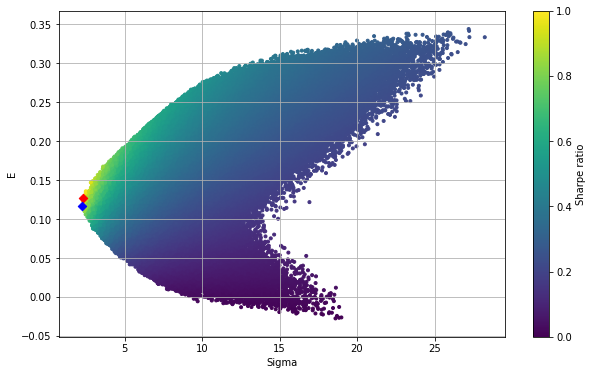

In [31]:
#Generamos el grafico de las simulaciones 
plt.figure(figsize=(10, 6))
plt.scatter(x=df_cvc['Varianza'], y=df_cvc['Rendimientos'], 
            c=df_cvc['Rendimientos'] / df_cvc['Varianza'], marker='.')
#portafolio riesgozo
plt.scatter(x=p_riesgoso['Varianza'], y=p_riesgoso['Rendimientos'], 
            c='red', marker='D')
#minima varianza
plt.scatter(x=p_min_Var['Varianza'], y=p_min_Var['Rendimientos'], 
            c='blue', marker='D')
plt.grid(True)
plt.xlabel('Sigma')
plt.ylabel('E')
plt.colorbar(label='Sharpe ratio')

### Grafica Sin ventas en corto

In [32]:
#Funcion para obtener los pesos
np.random.seed(54321)

def get_weights():    
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    return weights

In [33]:
#obtenemos los primeros pesos
weights =  get_weights()
weights

array([0.23995812, 0.16420046, 0.20841516, 0.11312608, 0.14292951,
       0.10882869, 0.02254198])

In [34]:
#Retornos esperados del portafolio anualizados
rets_portaf = np.sum(rets.mean() * weights) * 252
print("Retornos esperados del portafolio: ",rets_portaf)
#Variacion esperada del portafolio anualizados
var_portaf=np.dot(weights.T, np.dot(rets.cov() * 252, weights))
print("La variacion esperada del portafilio es:", var_portaf)
#Desviacion estandart del portafolio  anualizados
desv_std = np.sqrt(var_portaf)
print("La desviciaon estandart (Volatilidad) del portafolio es: ", desv_std)

Retornos esperados del portafolio:  -0.0015052911071630043
La variacion esperada del portafilio es: 0.0228840467226642
La desviciaon estandart (Volatilidad) del portafolio es:  0.15127473920871323


In [35]:
#generamos los portafolios aleatorios 
prets = []
pvols = []
sharpe = []
pesos = []

for p in range (100_000):    
    weights= get_weights()
    
    rendimiento = np.dot(weights,rend_esp)
    varianza =  np.sqrt(np.dot(weights.T,np.dot(cov_mtx, weights))) * 252
    c_sharpe = rendimiento / varianza
    
    prets.append(rendimiento)    
    pvols.append(varianza)
    sharpe.append(c_sharpe)
    pesos.append(weights)
    
prets = np.array(prets)
pvols = np.array(pvols)
sharpe = np.array(sharpe)

In [36]:
# Transforma listas en dataFrame
dict_P = {'Rendimientos': prets,'Varianza': pvols,'val_Sharpe': sharpe}

for i, k_nombre in enumerate(rets.columns):
    dict_P[k_nombre] = [j[i] for j in pesos]
df_svc = pd.DataFrame(dict_P)
#df_svc.head()

In [37]:
min_volatility = df_svc['Varianza'].min()
max_sharpe = df_svc['val_Sharpe'].max()
#selecciona portafolios
p_riesgoso = df_svc.loc[df_svc['val_Sharpe'] == max_sharpe]
p_min_Var = df_svc.loc[df_svc['Varianza'] == min_volatility]


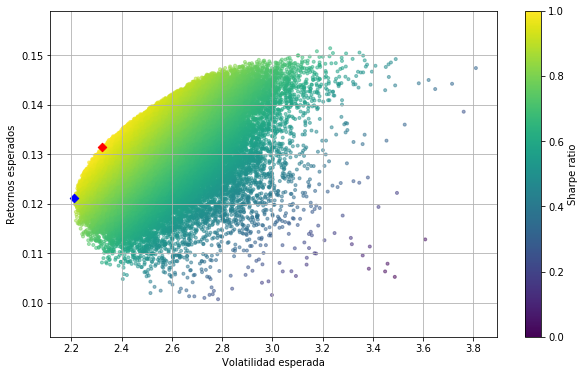

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df_svc['Varianza'], y=df_svc['Rendimientos'], 
            c=df_svc['Rendimientos'] / df_svc['Varianza'], marker='.',alpha=.5)
#portafolio riesgozo
plt.scatter(x=p_riesgoso['Varianza'], y=p_riesgoso['Rendimientos'], 
            c='red', marker='D')
#minima varianza
plt.scatter(x=p_min_Var['Varianza'], y=p_min_Var['Rendimientos'], 
            c='blue', marker='D')
plt.grid(True)
plt.xlabel('Volatilidad esperada')
plt.ylabel('Retornos esperados')
plt.colorbar(label='Sharpe ratio')

### Grafica con puntos de la frontera eficiente *

* Bibliografia:
Python para Finanzas
Yves Hilpisch
Publicado por O'Reilly Media, Inc., 2014
Capitulo II - seccion Statistics

In [39]:
def statistics(weights):
    ''' Parámetros
    ==========
    pesos: en forma de matriz
     ponderaciones para diferentes valores en cartera

    Devoluciones
    =======
    pret: flotador
     rendimiento esperado de la cartera
    pvol: flotador
     volatilidad esperada de la cartera
    pret / pvol: flotador
     Relación de Sharpe para rf = ..5
     '''
    
    weights = np.array(weights)
    pret = np.dot(weights,rend_esp)
    pvol = np.sqrt(np.dot(weights.T, np.dot(cov_mtx, weights))) * 252
    return np.array([pret, pvol, pret  / pvol])

In [40]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [41]:
#restriccion
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
print(cons)
bnds = tuple((0, 1) for x in range(noa))
print(bnds)

{'type': 'eq', 'fun': <function <lambda> at 0x0000010EA5C02798>}
((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))


In [42]:
#Optimizamos el portafolio
%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',bounds=bnds, constraints=cons)
opts

Wall time: 0 ns


     fun: -0.0566945517246346
     jac: array([ 8.62968154e-05, -9.32570547e-05,  1.47913117e-04, -1.28897373e-04,
        8.77426937e-05,  2.70819291e-05, -1.14836264e-04])
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.14852975, 0.23914536, 0.15722199, 0.07665038, 0.06490623,
       0.18617417, 0.12737213])

In [43]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [44]:
def min_func_port(weights):
    return statistics(weights)[1]

In [45]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [46]:
%%time
trets = np.linspace(0.11, 0.155, 20)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    #aplicamos la funcion de optimizacion (funcion Solver en Excel)
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                    bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

Wall time: 125 ms


In [47]:
optv = sco.minimize(min_func_variance, noa * [1. / noa,],
                method='SLSQP', bounds=bnds,
                constraints=cons)
optv

     fun: 12.58907295642003
     jac: array([10.32016361,  7.7661401 , 17.49624264, 18.75546753,  5.50901532,
        4.03722239, 30.87027884])
 message: 'Optimization terminated successfully.'
    nfev: 46
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([3.79101105e-14, 1.44226414e-13, 3.01388662e-01, 1.37133773e-01,
       0.00000000e+00, 1.61467768e-13, 5.61477565e-01])

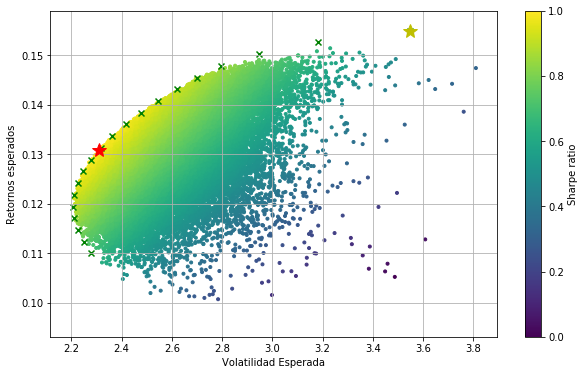

In [48]:
plt.figure(figsize=(10, 6))
# composición de cartera aleatoria
plt.scatter(pvols, prets, c=prets / pvols, marker='.')
# frontera eficiente
plt.scatter(tvols, trets, c='g', marker='x')
# portfolio with highest Sharpe ratio
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],'r*', markersize=15.0)
# minimum variance portfolio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize=15.0)
         
plt.grid(True)
plt.xlabel('Volatilidad Esperada')
plt.ylabel('Retornos esperados')
plt.colorbar(label='Sharpe ratio')

In [49]:
#obtenemos los portafolios de la frontera eficiente
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

#se realiza la interpolacion
tck = sci.splrep(evols, erets)

In [50]:
def f(x):
    ''' Función de frontera eficiente (aproximación de splines).'''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' Primera derivada de la función de frontera eficiente.'''
    return sci.splev(x, tck, der=1)

In [51]:
def equations(p, rf=0.05):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2]) +.01
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [52]:
opt = sco.fsolve(equations, [.05, 300, .05])
opt

C:\Users\mb83982\AppData\Local\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


array([0.05      , 0.03616231, 2.22327168])

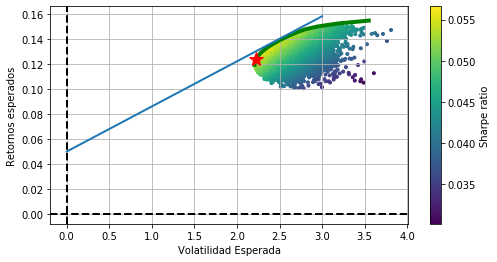

In [53]:
plt.figure(figsize=(8, 4))

# random portfolio composition
plt.scatter(pvols, prets,c=(prets ) / pvols, marker='.')  

# efficient frontier
plt.plot(evols, erets, 'g', lw=4.0)

# capital market line
cx = np.linspace(0.0, 3)
plt.plot(cx, opt[0] + opt[1]  * cx   , lw=2)
         
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0)
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('Volatilidad Esperada')
plt.ylabel('Retornos esperados')
plt.colorbar(label='Sharpe ratio')

# 4.- Encuentra el portafolio riesgoso óptimo (maximiza el coeficiente de Sharpe)

Minimizamos la varianza de la cartera

In [54]:
print("Portafolio con la minima varianza es: ")
print(p_min_Var)
print('-' * 50)
print("El portafolio riesgozo es: ")
print(p_riesgoso)

Portafolio con la minima varianza es: 
       Rendimientos  Varianza  val_Sharpe     ALSEA    WALMEX  LIVEPOLC  \
85791      0.121112  2.211023    0.054776  0.172471  0.196382  0.093626   

        GENTERA   ELEKTRA   MEGACPO  GCARSOA1  
85791  0.044141  0.115663  0.291888  0.085828  
--------------------------------------------------
El portafolio riesgozo es: 
       Rendimientos  Varianza  val_Sharpe     ALSEA    WALMEX  LIVEPOLC  \
61805      0.131495  2.322781    0.056611  0.147268  0.245138  0.139943   

        GENTERA  ELEKTRA  MEGACPO  GCARSOA1  
61805  0.069586  0.06454  0.17977  0.153755  


# 5.- Calcula el VaR paramétrico del portafolio riesgoso óptimo (1 día, 95% de confianza)

In [55]:
S = 1_000_000
confianza = 0.95
F = norm.ppf(confianza)

d_anual = np.sqrt(p_riesgoso['Varianza']/100)
std_diaria = np.sqrt(p_riesgoso['Varianza']/(100*252))

var_anual = S * F * d_anual
var_diario = S * F * std_diaria

pesos = np.array(p_riesgoso)[0][-7:]
Vector_pos = pesos * S

vaR_activos_diaria = Vector_pos * F * mtx_diagonal
vaR_activos_anual = Vector_pos * F * (mtx_diagonal * 252)

diversificacion_a = abs(var_anual - vaR_activos_anual.sum())
diversificacion_d = abs(var_diario - vaR_activos_diaria.sum())

print("VaR Anual :", '${:,.2f}'.format(var_anual.to_numpy()[0]))
print("VaR Diario :", '${:,.2f}'.format(var_diario.to_numpy()[0]))
print("Diversificación anual :", '${:,.2f}'.format(diversificacion_a.to_numpy()[0]))
print("Diversificación diaria :", '${:,.2f}'.format(diversificacion_d.to_numpy()[0]))


VaR Anual : $250,686.77
VaR Diario : $15,791.78
Diversificación anual : $138,193.95
Diversificación diaria : $15,345.38


# 6.- BONUS POINT

Elige los porcentajes a invertir en el portafolio riesgoso óptimo y el activo libre de riesgo (maximizar la función de utilidad)

In [56]:
Erp = p_riesgoso['Rendimientos'].to_numpy()[0]
p_sigma = np.sqrt(p_riesgoso['Varianza'].to_numpy()[0]/100)
y = ( Erp - rf) / (A * (p_sigma**2))
print("El valor de y* es: {:.2%}".format(y) )

El valor de y* es: 116.95%
